In [36]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from scipy.interpolate import griddata
from matplotlib.gridspec import GridSpec
import struct

MeshesVertices = dict()
MeshesEdges = dict()
MeshesFaces = dict()
ErrorData = dict()
Solution = dict()

for n in range(1,8):
    Vadress = "Meshdata/VerticesRing" + str(n) +".txt"
    MeshesVertices['V'+str(n)] = np.genfromtxt( Vadress )
    Eadress = "Meshdata/EdgesRing" + str(n) +".txt"
    MeshesEdges['E'+str(n)] = np.genfromtxt( Eadress )
    Fadress = "Meshdata/FacesRing" + str(n) +".txt"
    MeshesFaces['F'+str(n)] = np.genfromtxt( Fadress )
    
    for alpha in range(1,9):
        Erradress = "Solutions/ErrorRing" + str(n) + "Field" + str(alpha)
        ErrorData['Error'+str(n)+str(alpha)] = np.genfromtxt( Erradress )
        Soladress = "Solutions/SolRing" + str(n) + "Field" + str(alpha)
        Solution['Sol'+str(n)+str(alpha)] = np.genfromtxt( Soladress )
        

In [37]:
def AnaDivAtRightVertex( a , d ):
    db1 = 2/3**0.5 * (d-1.)
    dm1 = 2./3.**0.5
    db2 = 2.*3.**0.5
    dm2 = -2.*3.**0.5
    I1 = dm1*( ((a)/(a+1.))*((1-d/4.)**(a+1.)-(1-d/2.)**(a+1.)) + 0.5*((1.-d/4.)**2 - (1.-d/2.)**2) )  +  db1*( (1.-d/4.)**(a)-(1.-d/2.)**(a) + d/4. )
    I2 = dm2*( (a)/(a+1.)*(1.-(1-d/4)**(a+1.)) + 0.5*(1. - (1-d/4.)**2) )  +  db2*( 1.-(1. - d/4)**a + d/4 )
    val = I1 + I2
    return val

def AnaDivAtInnerVertex( x_0 , y_0 , a , d ):
    I = x_0**(a+1)*((4*a)/((3**0.5)*(a+1)) - 4/(3**0.5))  +  (x_0-d/2)**a * ((-a*(x_0-d/2)*2)/((a+1)*3**0.5) - 2*(d-x_0)/(3**0.5))  +  (x_0+d/2)**a * ((a*(x_0+d/2)*2)/((a+1)*3**0.5) + 2*(d+x_0)/(3**0.5))  +  (3**0.5)*(d**2)/2
    return I

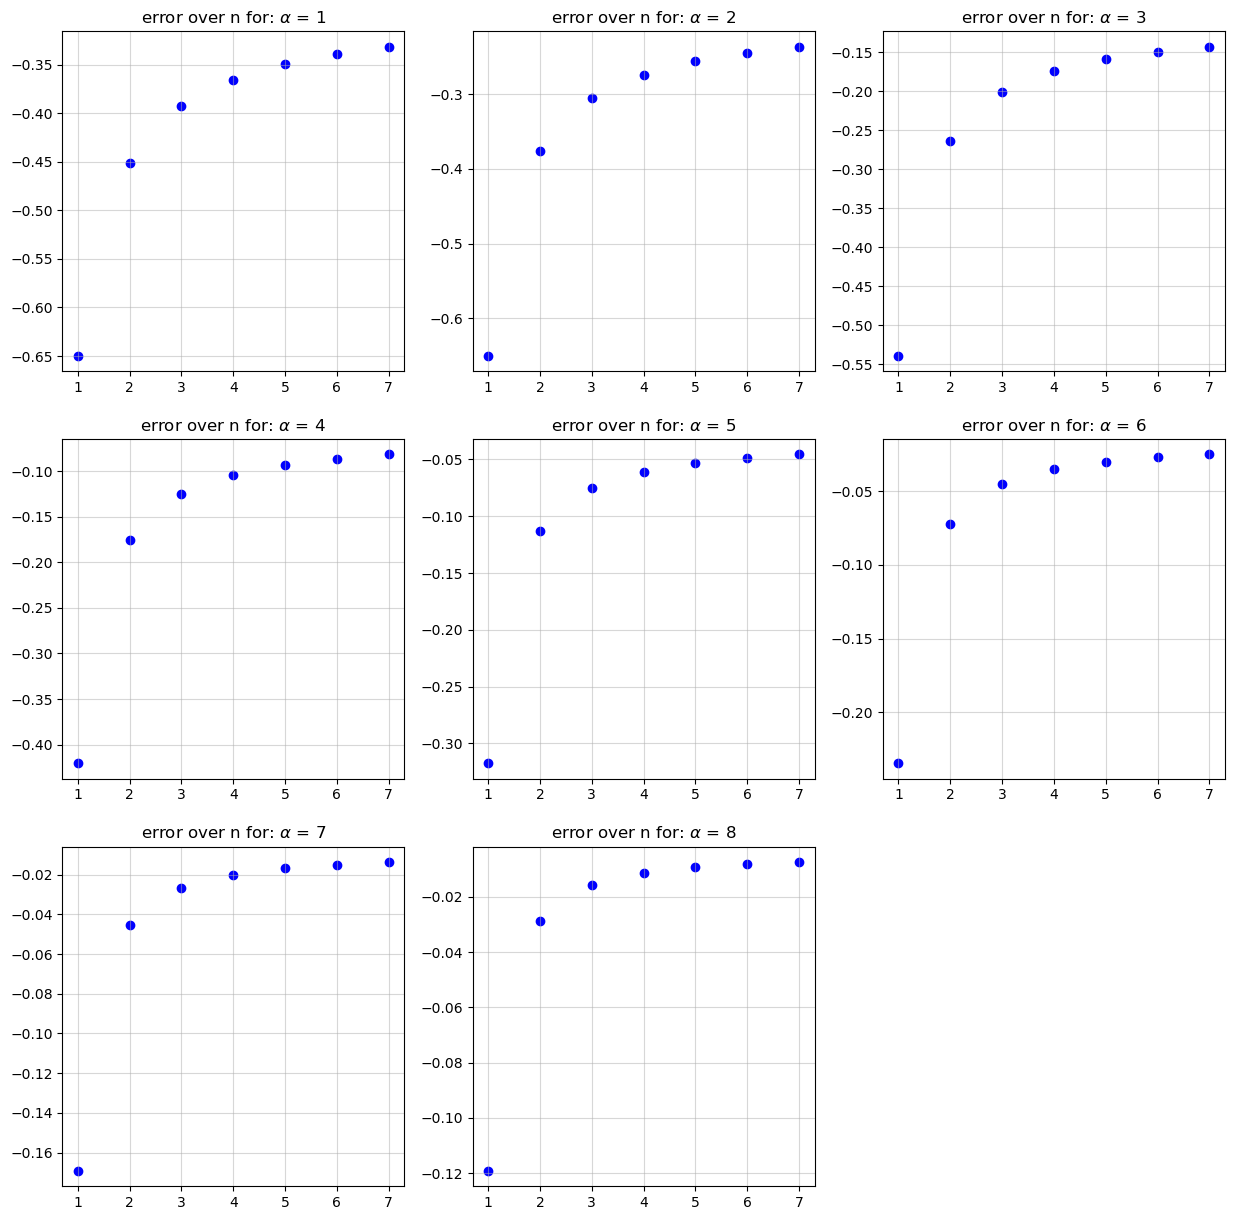

In [38]:
plt.figure(figsize=(15,15))
k = 1
for alpha in range(1,9):
    NodeIndex = []
    for n in range(1,8):
        for i in range (0,len(MeshesVertices['V'+str(n)])):
            if (MeshesVertices['V'+str(n)][i][0] == 0.5 and MeshesVertices['V'+str(n)][i][1] == 0.5):
                NodeIndex.append(i)
        

    plt.subplot(330+k)
    plt.grid(alpha=0.5)
    for i in range(0, len(NodeIndex)):
        plt.title(r'error over n for: $\alpha$ = ' + str(alpha))
        #plt.scatter(i+1, ErrorData['Error'+str((i+1))+str(alpha)][NodeIndex[i]], color='black')
        plt.scatter(i+1 , Solution['Sol'+str(i+1)+str(alpha)][NodeIndex[i]]-AnaDivAtInnerVertex( 0.5 , 0.5 , alpha , 1/(2*(i+1)) ), color='b')

    k += 1

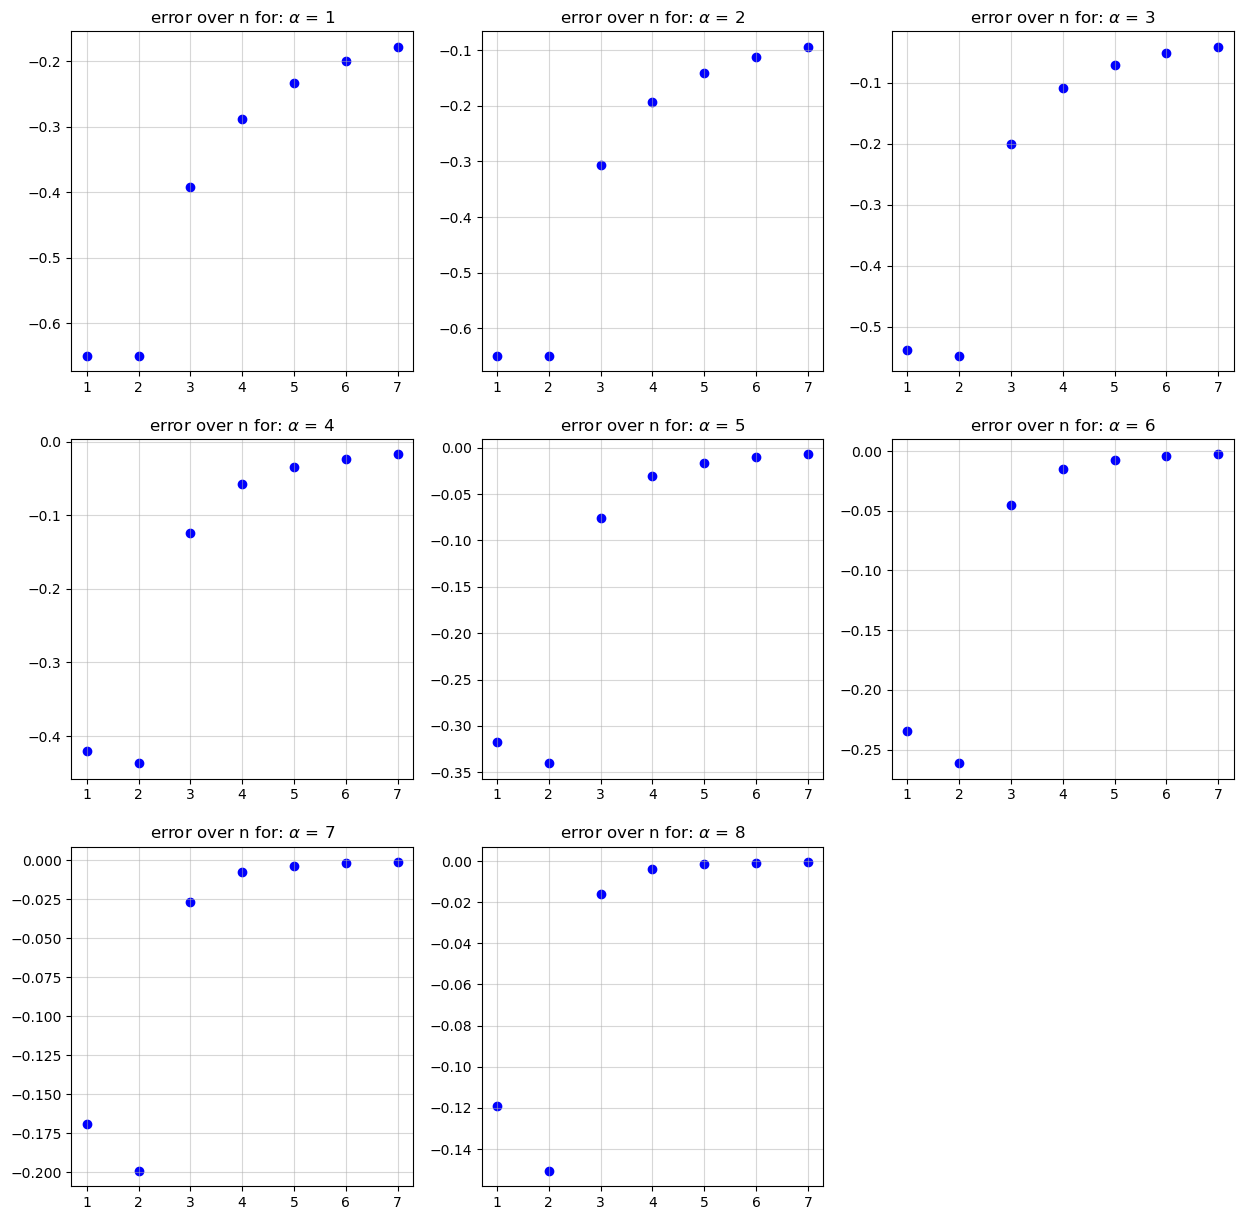

In [39]:
plt.figure(figsize=(15,15))
k = 1
for alpha in range(1,9):
    NodeIndex = []
    for n in range(1,8):
            NodeIndex.append( len(MeshesVertices['V'+str(n)])-6*n-1)
        

    plt.subplot(330+k)
    plt.grid(alpha=0.5)
    for i in range(0, len(NodeIndex)):
        x_0 = MeshesVertices['V'+str(i+1)][NodeIndex[i]][0]
        y_0 = MeshesVertices['V'+str(i+1)][NodeIndex[i]][1]
        plt.title(r'error over n for: $\alpha$ = ' + str(alpha))
        #plt.scatter(i+1, ErrorData['Error'+str((i+1))+str(alpha)][NodeIndex[i]], color='black')
        plt.scatter(i+1 , Solution['Sol'+str(i+1)+str(alpha)][NodeIndex[i]]-AnaDivAtInnerVertex( x_0 , y_0 , alpha , 1/(2*(i+1)) ), color='b')

    k += 1

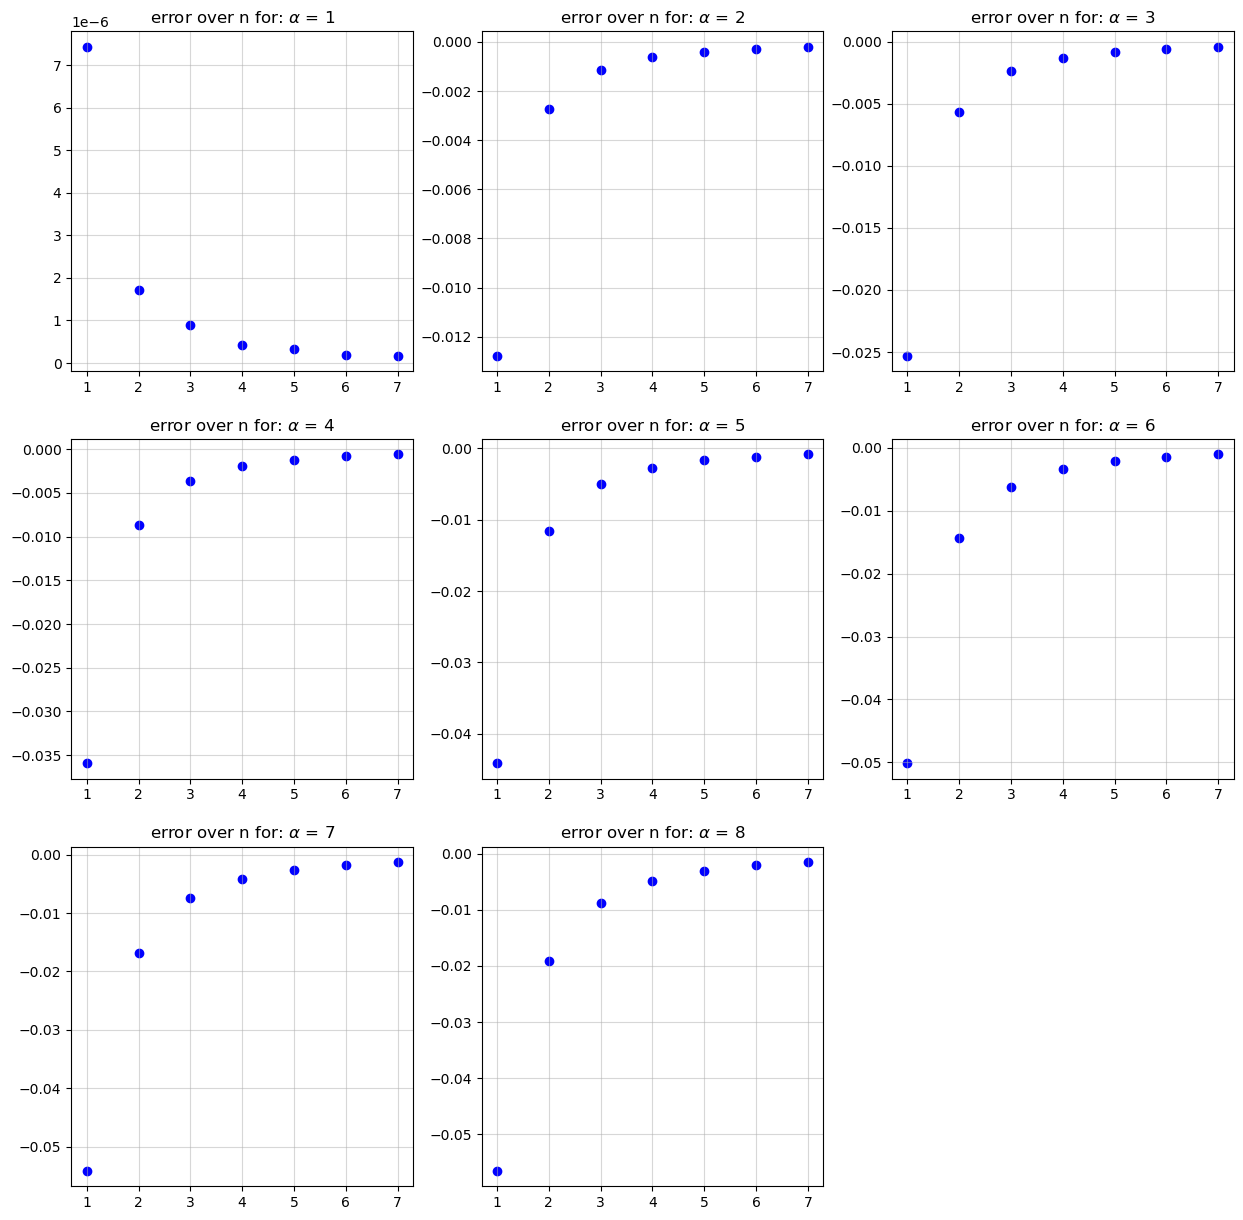

In [40]:
plt.figure(figsize=(15,15))
k = 1
for alpha in range(1,9):
    NodeIndex = []
    for n in range(1,8):
        for i in range (0,len(MeshesVertices['V'+str(n)])):
            if (MeshesVertices['V'+str(n)][i][0] == 1):
                NodeIndex.append(i)

    plt.subplot(330+k)
    plt.grid(alpha=0.5)
    for i in range(0, len(NodeIndex)):
        plt.title(r'error over n for: $\alpha$ = ' + str(alpha))
        #plt.scatter(i+1, ErrorData['Error'+str((i+1))+str(alpha)][NodeIndex[i]], color='black')
        plt.scatter(i+1 , Solution['Sol'+str(i+1)+str(alpha)][NodeIndex[i]]-AnaDivAtRightVertex( alpha , 1/(2*(i+1)) ), color='b')

    k += 1

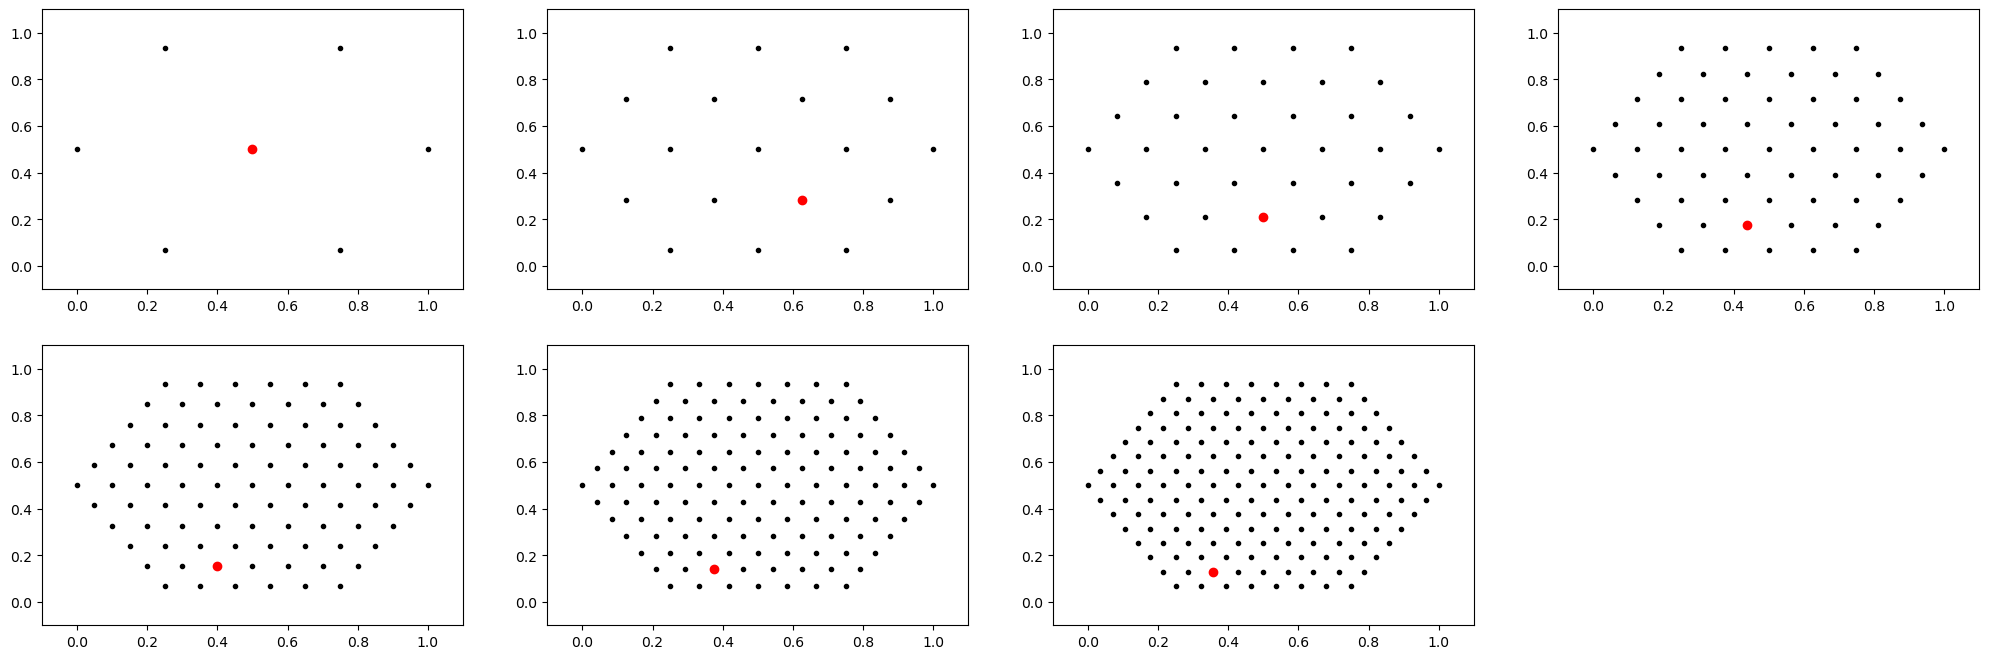

In [45]:
for alpha in range(1,9):
    NodeIndex = []
    for n in range(1,8):
            NodeIndex.append( len(MeshesVertices['V'+str(n)])-6*n-1)

plt.figure(figsize=(25,8))
for n in range(1,8):
    plt.subplot(240+n)
    #plt.grid(alpha=0.5)
    plt.xlim(-0.1,1.1)
    plt.ylim(-0.1,1.1)
    for i in range(0,len(MeshesVertices['V'+str(n)])):
        if(i==NodeIndex[n-1]):
            plt.scatter(MeshesVertices['V'+str(n)][i][0] , MeshesVertices['V'+str(n)][i][1] ,color='red', marker='o')
            continue
        plt.scatter( MeshesVertices['V'+str(n)][i][0] , MeshesVertices['V'+str(n)][i][1] ,color='black', marker='.')
        
    